In [1]:
from kervis.utils import Model
from kervis.utils import Dataset
from kervis.kernels import ShortestPath, Graphlet, VertexHistogram, EdgeHistogram

In [2]:
SP = Model("MUTAG", ShortestPath, "SVM")

Accuracy for MUTAG is 0.7631578947368421


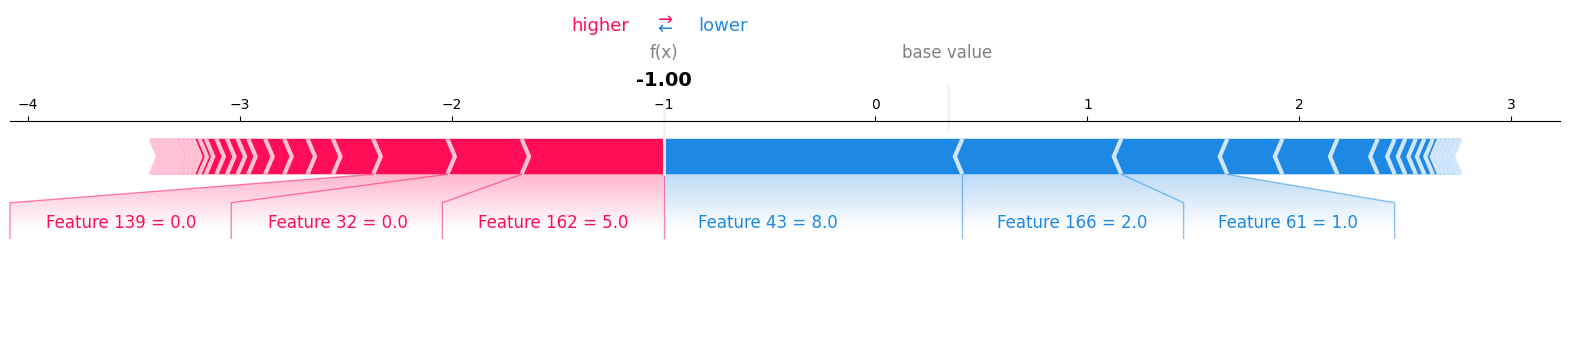

In [16]:
SP.force_plot(0)

In [18]:
SP.kernel.attributes[139]

(0, 0, 5)

In [19]:
SP.find_features(0, 139)

[(7, 12, 5),
 (2, 12, 5),
 (2, 8, 5),
 (2, 14, 5),
 (6, 14, 5),
 (3, 13, 5),
 (6, 12, 5),
 (1, 9, 5),
 (5, 13, 5),
 (1, 11, 5)]

In [5]:
import networkx as nx

In [6]:
shap_feature_index = 43
graph_index = 0

paths = []
for path in nx.all_pairs_shortest_path_length(SP.dataset.graphs[graph_index]):
    for key, value in path[1].items():
        if value == SP.kernel.attributes[shap_feature_index][2]:
            paths.append((*sorted((path[0], key)), value))

paths = list(set(paths))
paths_in_graph = []
for path in paths:
    if SP.dataset.graphs[graph_index].nodes(data="label")[path[0]] == SP.kernel.attributes[shap_feature_index][0] \
        and SP.dataset.graphs[graph_index].nodes(data="label")[path[1]] == SP.kernel.attributes[shap_feature_index][1]:
        paths_in_graph.append(path)

paths_in_graph

[(5, 8, 2),
 (3, 10, 2),
 (2, 6, 2),
 (9, 13, 2),
 (2, 4, 2),
 (5, 10, 2),
 (6, 7, 2),
 (11, 13, 2),
 (3, 5, 2),
 (7, 9, 2),
 (4, 7, 2),
 (1, 3, 2),
 (8, 10, 2),
 (12, 14, 2),
 (4, 11, 2),
 (4, 9, 2),
 (10, 12, 2),
 (1, 5, 2),
 (8, 14, 2),
 (4, 6, 2),
 (10, 14, 2),
 (9, 11, 2)]

In [7]:
SP.kernel.attributes[shap_feature_index]

(0, 0, 2)

In [8]:
SP.shap_values.values[graph_index][shap_feature_index]

-1.41